In [1]:
# General libraries
import pandas as pd
import numpy as np
#from package import euklid as eu
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
warnings.filterwarnings("ignore")
%matplotlib notebook

In [2]:
df_prediction = pd.read_csv("../data/model_accuracy_gold.csv", index_col = False)
df_prediction = df_prediction.drop(columns=['Unnamed: 0'])

## Preliminary work on the dataset

In [3]:
df_prediction

,Unnamed: 0.1,LogReg_pred,LogReg_accuracy,LogReg_prob,RNN_pred,RNN_accuracy,RNN_prob,LSTM_price_accuracy,RF_pred,RF_accuracy,...,LGBM_pred,LGBM_accuracy,LGBM_prob,XGB_pred,XGB_accuracy,XGB_prob,y,kNN_pred,kNN_accuracy,kNN_prob
0,0,0,0.534272,0.435015,0,0.539906,0.440501,0.815962,0,0.537089,...,0,0.534272,0.417784,0,0.535211,0.363009,1,0,0.535211,0.5
1,1,0,0.534272,0.438317,0,0.539906,0.438469,0.815962,0,0.537089,...,0,0.534272,0.417784,0,0.535211,0.334406,0,0,0.535211,0.5
2,2,0,0.534272,0.441080,0,0.539906,0.438368,0.815962,1,0.537089,...,0,0.534272,0.417784,1,0.535211,0.538637,1,0,0.535211,0.5
3,3,0,0.534272,0.435446,0,0.539906,0.437083,0.815962,0,0.537089,...,0,0.534272,0.417784,0,0.535211,0.298839,1,0,0.535211,0.5
4,4,0,0.534272,0.430490,0,0.539906,0.403022,0.815962,0,0.537089,...,0,0.534272,0.431615,0,0.535211,0.411486,1,0,0.535211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,1,0.534272,0.528832,0,0.539906,0.486045,0.815962,0,0.537089,...,0,0.534272,0.463188,0,0.535211,0.425173,0,0,0.535211,0.0
1061,1061,1,0.534272,0.523879,1,0.539906,0.510491,0.815962,0,0.537089,...,0,0.534272,0.478714,0,0.535211,0.425173,1,0,0.535211,0.5
1062,1062,1,0.534272,0.521895,0,0.539906,0.478003,0.815962,0,0.537089,...,0,0.534272,0.489069,0,0.535211,0.439999,1,0,0.535211,0.5
1063,1063,1,0.534272,0.517769,0,0.539906,0.462106,0.815962,1,0.537089,...,0,0.534272,0.484030,0,0.535211,0.464752,1,0,0.535211,0.5


In [4]:
df_prediction["Ensambling_mean_lik"] = df_prediction.filter(like="prob").mean(axis='columns')
df_prediction["Ensambling_value_mean_lik"] = list(map(lambda x: 0 if x<0.5 else 1, df_prediction["Ensambling_mean_lik"]))


In [5]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_prediction["y"], df_prediction["Ensambling_value_mean_lik"])

# Computing Accuracy, Precision and Recall
accuracy = accuracy_score(df_prediction["y"], df_prediction["Ensambling_value_mean_lik"])
print(accuracy)



0.5427230046948357


In [6]:
df_prediction["Ensambling_mode"] = df_prediction.filter(like="pred").mode(axis='columns')
#df_prediction

In [7]:
df_prediction["Ensambling_accuracy_mode"] = [accuracy for x in range(len(df_prediction))]

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_prediction["y"], df_prediction["Ensambling_mode"])

# Computing Accuracy, Precision and Recall
accuracy = accuracy_score(df_prediction["y"], df_prediction["Ensambling_mode"])
print(accuracy)


0.5380281690140845


# Max prob

In [9]:
df_prediction["Ensambling_max_lik"] = list(map(lambda x: 0 if x<0.5 else 1, df_prediction.filter(like="prob").max(axis='columns')))
accuracy = accuracy_score(df_prediction["y"], df_prediction["Ensambling_max_lik"])
accuracy

0.5154929577464789

In [10]:
df_prediction.columns

Index(['Unnamed: 0.1', 'LogReg_pred', 'LogReg_accuracy', 'LogReg_prob',
       'RNN_pred', 'RNN_accuracy', 'RNN_prob', 'LSTM_price_accuracy',
       'RF_pred', 'RF_accuracy', 'RF_prob', 'SVC_pred', 'SVC_accuracy',
       'SVC_prob', 'LGBM_pred', 'LGBM_accuracy', 'LGBM_prob', 'XGB_pred',
       'XGB_accuracy', 'XGB_prob', 'y', 'kNN_pred', 'kNN_accuracy', 'kNN_prob',
       'Ensambling_mean_lik', 'Ensambling_value_mean_lik', 'Ensambling_mode',
       'Ensambling_accuracy_mode', 'Ensambling_max_lik'],
      dtype='object')

# Model

In [11]:
X = df_prediction[["LogReg_prob",
                  "RNN_prob",
                  "RF_prob",
                  "SVC_prob",
                  "LGBM_prob",
                  "XGB_prob",
                  "kNN_prob",
                  "Ensambling_mean_lik",
                  "Ensambling_mode"]]
y = df_prediction["y"]

In [12]:
# Split in 80/20 the dataframeX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                          shuffle = False)

### Cleaning

In [13]:
# Train and fit
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

# Predict
y_all = kNN.predict(X)
y_pred_train = kNN.predict(X_train)
y_pred_test = kNN.predict(X_test)
# Compute Accuracy
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)
test_all = accuracy_score(y,y_all)

print("Train Accuracy: {:.5f} ".format(train_acc))
print("Test Accuracy: {:.5f} ".format(test_acc))


Train Accuracy: 0.69718 
Test Accuracy: 0.55399 


In [14]:
df_prediction["Ensambling_SVC"] = y_all


In [15]:
df_prediction["Ensambling_accuracy_SVC"] = [test_acc for x in range(len(df_prediction))]

In [16]:
df_prediction.columns

Index(['Unnamed: 0.1', 'LogReg_pred', 'LogReg_accuracy', 'LogReg_prob',
       'RNN_pred', 'RNN_accuracy', 'RNN_prob', 'LSTM_price_accuracy',
       'RF_pred', 'RF_accuracy', 'RF_prob', 'SVC_pred', 'SVC_accuracy',
       'SVC_prob', 'LGBM_pred', 'LGBM_accuracy', 'LGBM_prob', 'XGB_pred',
       'XGB_accuracy', 'XGB_prob', 'y', 'kNN_pred', 'kNN_accuracy', 'kNN_prob',
       'Ensambling_mean_lik', 'Ensambling_value_mean_lik', 'Ensambling_mode',
       'Ensambling_accuracy_mode', 'Ensambling_max_lik', 'Ensambling_SVC',
       'Ensambling_accuracy_SVC'],
      dtype='object')

<IPython.core.display.Javascript object>


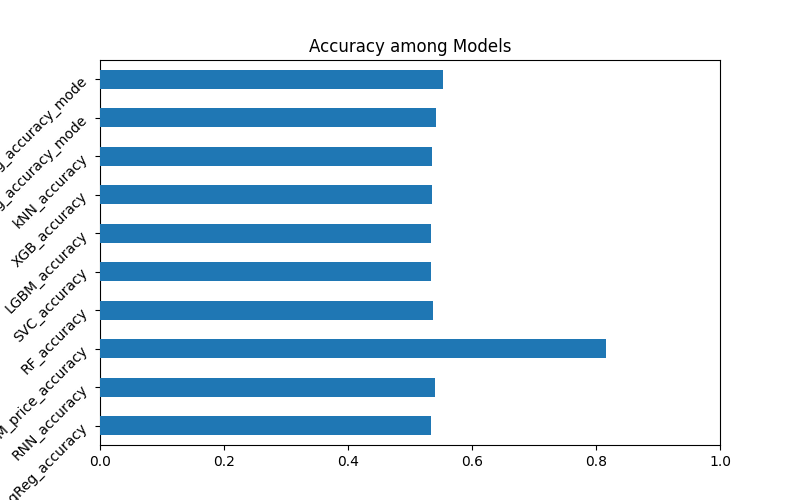

In [18]:
Accuracy_list = [df_prediction["LogReg_accuracy"][0],
             df_prediction["RNN_accuracy"][0], 
                 df_prediction["LSTM_price_accuracy"][0],
             df_prediction["RF_accuracy"][0],
                df_prediction["SVC_accuracy"][0],
                df_prediction["LGBM_accuracy"][0],
             df_prediction["XGB_accuracy"][0], 
                 df_prediction["kNN_accuracy"][0],
             df_prediction["Ensambling_accuracy_mode"][0],
                df_prediction["Ensambling_accuracy_SVC"][0]
            ]



Model_list = ['LogReg_accuracy',
              'RNN_accuracy', 
              'LSTM_price_accuracy',
              'RF_accuracy', 
              'SVC_accuracy',
             "LGBM_accuracy",
             "XGB_accuracy",
              "kNN_accuracy",
              "Ensambling_accuracy_mode",
              "Ensambling_accuracy_mode"
             ]

graph = pd.DataFrame({'Model': Model_list, 'Accuracy_test' : Accuracy_list})

graph.plot(x = 'Model', y = 'Accuracy_test', kind = "barh", figsize = (8, 5), xlim = (0, 1),
           zorder = 3, title = 'Accuracy among Models', fontsize  = 10, rot = 45,
           legend = None)

# Sorting the Value by Test Accuracy
graph = graph.sort_values('Accuracy_test', ascending=True)
